In [1]:
import os
import numpy as np
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import datasets, layers, models
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 파일 전처리

In [4]:
file_path = r'C:\Users\LIM\Downloads\rose_data\Rose_train'

splitfolders.ratio(file_path, './rose_data', seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 3240 files [00:01, 1931.45 files/s]


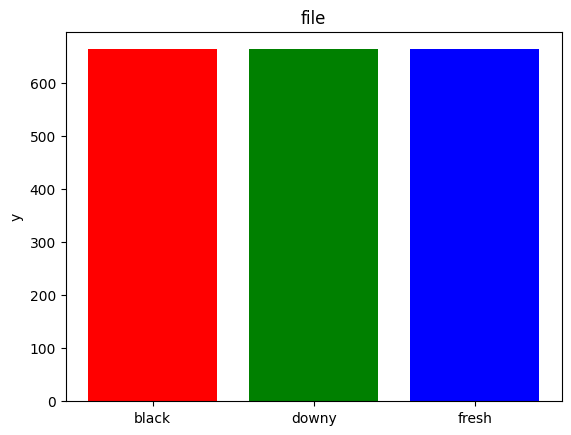

In [2]:
black = os.listdir('./rose_data/train/Black Spot/')
downy = os.listdir('./rose_data/train/Downy Mildew/')
fresh = os.listdir('./rose_data/train/Fresh Leaf/')

black2 = len(black)
downy2 = len(downy)
fresh2 = len(fresh)

name = ['black', 'downy', 'fresh']
files = [black2, downy2, fresh2]

plt.bar(name, files, color = ['red', 'green', 'blue'])
plt.ylabel('y')
plt.title('file')
plt.show()

In [3]:
len(black), len(downy), len(fresh)

(664, 664, 664)

In [35]:
for i in range(200):
    os.remove('./rose_data/train/Black Spot/' + black[i])

for i in range(200):
    os.remove('./rose_data/train/Downy Mildew/' + downy[i])

for i in range(200):
    os.remove('./rose_data/train/Fresh Leaf/' + fresh[i])

In [39]:
len(black), len(downy), len(fresh)

(664, 664, 664)

# 학습 파라미터

In [11]:
num_epoch=50                 
batch_size=32                   
learning_rate=0.001               
dropout_rate=0.3        
input_shape=(128, 128, 3)               
num_class=3

# 학습

In [12]:
train_dir = './rose_data/train/'
test_dir = './rose_data/test/'
val_dir = './rose_data/val/'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size = input_shape[:2],
    color_mode = 'rgb',
    class_mode = 'categorical'
)

val_dataset = train_datagen.flow_from_directory(
    val_dir,
    target_size = input_shape[:2],
    color_mode = 'rgb',
    class_mode = 'categorical'
)

Found 1992 images belonging to 3 classes.
Found 324 images belonging to 3 classes.


In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))

In [14]:
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

model.compile(optimizer= tf.optimizers.Adam(learning_rate),
              loss = 'categorical_crossentropy',
              metrics=['acc'])

ReduceLROnPlateau : 검증 손실이 개선되지 않을 때 학습률을 동적으로 조정하여 학습을 최적화하는 콜백 함수

- monitor : 모니터링할 지표 기본값 : 'val_loss'
- factor : 학습률을 얼마나 감소시킬 것인지를 결정하는 인수 기본값 : '0.1'
- patience : 검증 손실이 개선되지 않을때, 얼마나 많은 epoch를 기다릴 것인지 결정하는 인수
- min_lr : 학습률의 하한을 결정하는 인수. 학습률이 min_lr 보다 작아지면 학습 중단

In [15]:
history = model.fit(
    train_dataset,
    epochs=num_epoch,
    callbacks=[early_stopping, reduce_lr],
    validation_data=val_dataset
)

Epoch 1/50
63/63 [==============================] - 17s 258ms/step - loss: 0.9264 - acc: 0.5788 - val_loss: 0.6057 - val_acc: 0.6389 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 18s 289ms/step - loss: 0.5605 - acc: 0.6878 - val_loss: 0.5406 - val_acc: 0.6821 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 18s 283ms/step - loss: 0.5169 - acc: 0.7274 - val_loss: 0.5552 - val_acc: 0.7191 - lr: 0.0010
Epoch 4/50
63/63 [==============================] - 17s 267ms/step - loss: 0.5248 - acc: 0.7149 - val_loss: 0.5091 - val_acc: 0.7006 - lr: 0.0010
Epoch 5/50
63/63 [==============================] - 18s 281ms/step - loss: 0.4882 - acc: 0.7425 - val_loss: 0.4999 - val_acc: 0.7809 - lr: 0.0010
Epoch 6/50
63/63 [==============================] - 23s 371ms/step - loss: 0.4543 - acc: 0.7791 - val_loss: 0.4473 - val_acc: 0.7963 - lr: 0.0010
Epoch 7/50
63/63 [==============================] - 24s 372ms/step - loss: 0.4272 - acc: 0.7841 - val_loss: 0.4307 - val_acc

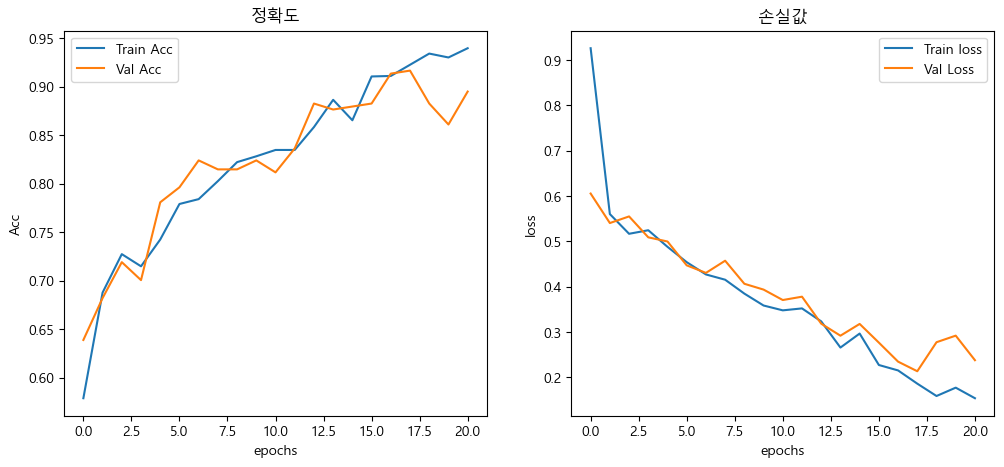

In [16]:
plt.rcParams['font.family'] = 'Malgun Gothic'

epochs = history.epoch
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label = 'Train Acc')
plt.plot(epochs, val_acc, label = 'Val Acc')
plt.title('정확도')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()

train_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label = 'Train loss')
plt.plot(epochs, val_acc, label = 'Val Loss')
plt.title('손실값')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [17]:
test_data = test_datagen.flow_from_directory(
    "./rose_data/test/",
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 324 images belonging to 3 classes.


In [18]:
y_ture = test_data.classes
y_pred = []

for pred in model.predict(test_data, verbose=0):
    y_pred.append(np.argmax(pred))

print(classification_report(y_ture,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.98      0.97      0.98       108
           2       0.86      0.88      0.87       108

    accuracy                           0.91       324
   macro avg       0.91      0.91      0.91       324
weighted avg       0.91      0.91      0.91       324



In [19]:
model.save('./rose.h5')

c:\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
